In [55]:
import joblib
import pandas as pd
import numpy as np 
from pathlib import Path
from matplotlib import pyplot as plt

In [3]:
pred_pkls_path = '/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/NewWorkflow/test_slurm2'
pred_pkls_path = Path(pred_pkls_path)

In [4]:
pred_pkls_files = sorted(pred_pkls_path.rglob('pythia*_pred.pkl'))

In [6]:
sample = []
for pred_pkls_file in pred_pkls_files:
    sample_pd = joblib.load(pred_pkls_file)
    sample_pd = sample_pd[(sample_pd["jet_nTracks"] > 1) & (sample_pd["target"] != '-')] 

    sample.append(sample_pd.sample(frac = 0.3))

In [8]:
sample = pd.concat(sample)

In [9]:
sample.shape

(61740598, 21)

In [22]:
sample.drop(columns=sample.columns[-7:], inplace=True)

In [23]:
sample

,run,event,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,event_weight,is_forward,is_leading,pt_idx,target
38784,364704.0,128244426.0,756.918274,-0.267729,13.0,0.016890,0.158292,-0.212644,2.0,0.400877,1.0,1.0,1,0
76944,364705.0,33428078.0,979.209412,-0.177722,29.0,0.035617,0.227922,0.263193,21.0,0.420153,0.0,1.0,2,1
184802,364704.0,134794190.0,521.805176,0.770232,15.0,0.025237,0.203193,-0.059303,4.0,1.047949,1.0,1.0,0,0
286675,364704.0,138678461.0,512.864563,-1.864337,14.0,0.035285,0.196587,-0.053137,21.0,0.459634,1.0,0.0,0,1
99196,364704.0,123346880.0,701.029419,-0.035616,12.0,0.012978,0.156514,-0.290759,2.0,0.411335,0.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267768,364704.0,8342423.0,648.258728,2.002168,7.0,0.021857,0.162479,-0.383852,2.0,0.471458,1.0,1.0,1,0
299310,364704.0,213567883.0,669.386841,1.112937,20.0,0.040012,0.236910,0.110355,21.0,0.369710,0.0,1.0,1,1
212162,364704.0,214787671.0,515.161072,-0.767121,29.0,0.052398,0.248215,0.350838,21.0,1.452550,0.0,1.0,0,1
367160,364706.0,10056041.0,1289.567017,-0.213357,22.0,0.011821,0.122256,0.077993,21.0,0.008037,1.0,1.0,4,1


In [25]:
import hist
from hist import Hist

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x1554dcf83670>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

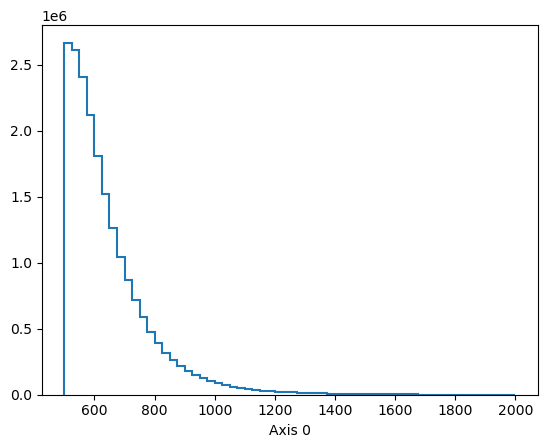

In [50]:
pt_hist =Hist(hist.axis.Regular(bins=60, start=500, stop=2000, overflow=True, underflow=True), 
                                storage=hist.storage.Weight())
pt_hist.fill(sample['jet_pt'], weight=sample['event_weight'])
pt_hist.plot()

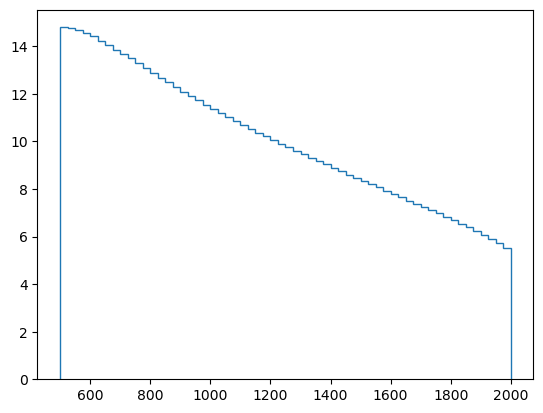

In [58]:
plt.stairs(np.log(pt_hist.values()), np.linspace(500,2000,61))

In [34]:
flatpt_factor = 1.0 / pt_hist.values()

In [47]:
pt_idx = np.digitize(sample['jet_pt'], bins=np.linspace(500,2000,61)) - 1

In [48]:
sample['flatpt_weight'] = sample['event_weight'] * flatpt_factor[pt_idx]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x1554da141a30>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

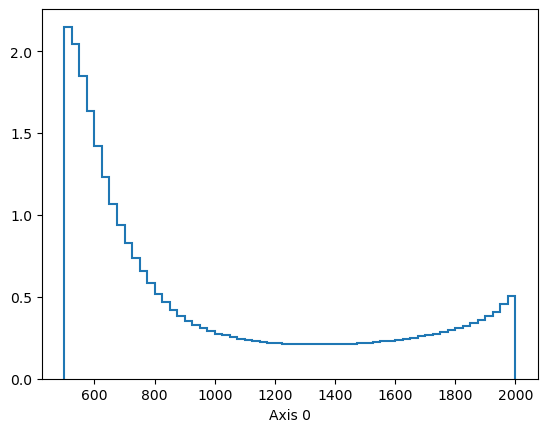

In [61]:
pt_hist_flat_pt =Hist(hist.axis.Regular(bins=60, start=500, stop=2000, overflow=True, underflow=True), 
                                storage=hist.storage.Weight())
pt_hist_flat_pt.fill(sample['jet_pt'], weight=sample['flatpt_weight'])
pt_hist_flat_pt.plot()